This notebook tries to refine the visualisations from group4's work all in Python: https://dnnsociety.org/2018/03/15/inside-doubans-top-250-a-door-pries-into-the-world-of-audiences-in-mainland-china/

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Douban Top 250/Douban Top 250.csv')

In [3]:
df.head()

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988856,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,718351,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
2,这个杀手不太冷,Léon,9.4,932418,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
3,阿甘正传,Forrest Gump,9.4,792958,导演: Robert Zemeckis,1994,美国,剧情 爱情
4,美丽人生,La vita è bella,9.5,463283,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争


In [4]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

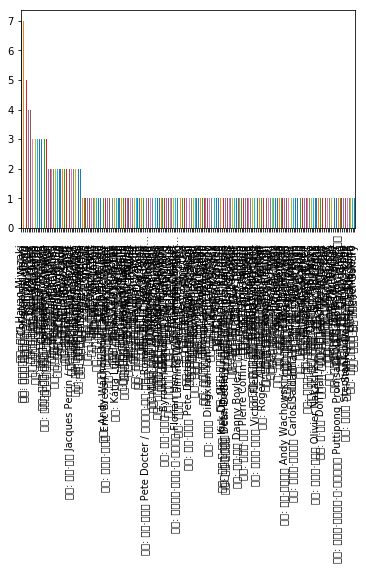

In [5]:
df['director'].value_counts().plot(kind='bar')

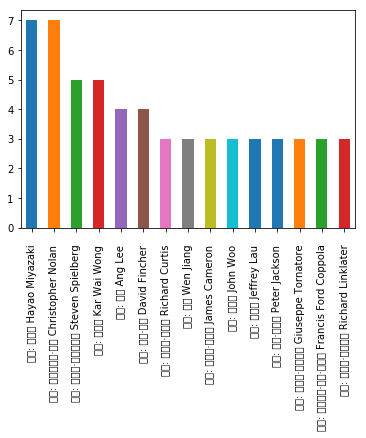

In [6]:
df['director'].value_counts()[:15].plot(kind='bar')

In [7]:
!pip install plotly

In [8]:
import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

In [9]:
from plotly.offline import iplot

In [10]:
from plotly.graph_objs import Bar

In [11]:
df_top15_directors = df['director'].value_counts()[:15]

iplot({
    "data": [Bar(x=df_top15_directors.index, y=df_top15_directors.values)],
    "layout": Layout(title="Top 250 Directors")
})

Let's talk about "导演: 王家卫 Kar Wai Wong". We need to highlight him to give the readers better visual guide.

In [12]:
df_top15_directors.index[2]

'导演: 史蒂文·斯皮尔伯格 Steven Spielberg   '

In [13]:
df_top15_directors.values[2]

5

In [14]:
key = df_top15_directors.index[2]

In [15]:
df_top15_directors[key]

5

In [16]:
colors = ['#409FB2'] * len(df_top15_directors)
colors[2] = '#FF8217'

In [17]:
iplot({
    "data": [Bar(
        x=df_top15_directors.index, 
        y=df_top15_directors.values,
        marker={
            'color': colors
        }
    )],
    "layout": Layout(title="Top 250 Directors")
})

In [18]:
from collections import Counter
c = Counter()
df['types'].apply(lambda x: c.update(set(x.split())))
c

Counter({'传记': 14,
         '儿童': 4,
         '冒险': 41,
         '剧情': 195,
         '动作': 30,
         '动画': 33,
         '历史': 11,
         '古装': 6,
         '同性': 8,
         '喜剧': 45,
         '奇幻': 33,
         '家庭': 25,
         '恐怖': 2,
         '悬疑': 34,
         '情色': 1,
         '惊悚': 34,
         '战争': 19,
         '歌舞': 5,
         '武侠': 3,
         '灾难': 1,
         '爱情': 63,
         '犯罪': 45,
         '科幻': 25,
         '纪录片': 4,
         '西部': 4,
         '运动': 2,
         '音乐': 7})

In [19]:
import wordcloud
from PIL import Image
import numpy as np

In [20]:
mask = np.array(Image.open('alice_mask.png'))

In [21]:
wc = wordcloud.WordCloud(background_color="white", max_words=2000, mask=mask)

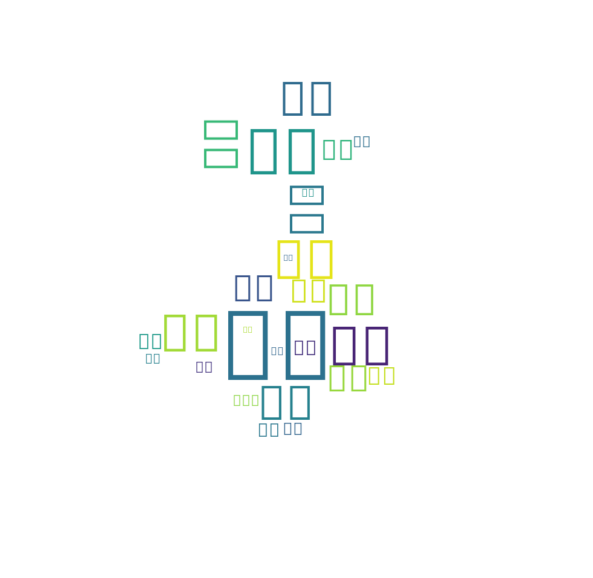

In [22]:
wc.generate_from_frequencies(c)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
'''
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
# Needs to modify this path if:
#     1) you are on different system
#     2) you want other font family
path = os.path.abspath('SourceHanSansSC/SourceHanSansSC-Normal.otf')
prop = mpl.font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()
%matplotlib inline
'''
_

Counter({'传记': 14,
         '儿童': 4,
         '冒险': 41,
         '剧情': 195,
         '动作': 30,
         '动画': 33,
         '历史': 11,
         '古装': 6,
         '同性': 8,
         '喜剧': 45,
         '奇幻': 33,
         '家庭': 25,
         '恐怖': 2,
         '悬疑': 34,
         '情色': 1,
         '惊悚': 34,
         '战争': 19,
         '歌舞': 5,
         '武侠': 3,
         '灾难': 1,
         '爱情': 63,
         '犯罪': 45,
         '科幻': 25,
         '纪录片': 4,
         '西部': 4,
         '运动': 2,
         '音乐': 7})

In [24]:
#mpl.rcParams['font.family']

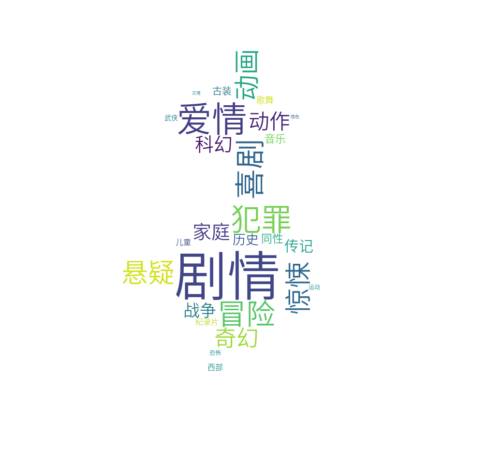

In [25]:
wc = wordcloud.WordCloud(background_color="white", max_words=2000, mask=mask, font_path='SourceHanSansSC/SourceHanSansSC-Normal.otf')
wc.generate_from_frequencies(c)
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
#help(wordcloud.WordCloud)

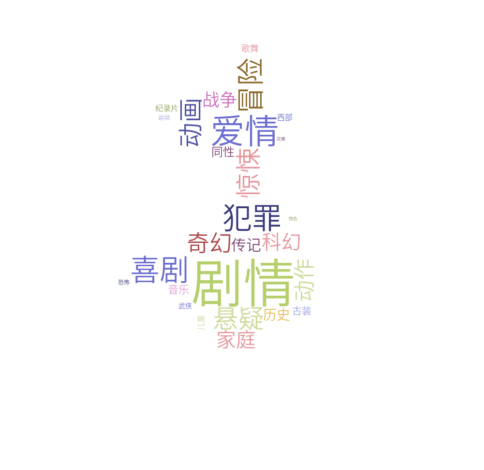

In [27]:
# Available matplotlib color map here:
# https://matplotlib.org/examples/color/colormaps_reference.html

wc = wordcloud.WordCloud(
    background_color="white", 
    max_words=2000, mask=mask, 
    font_path='SourceHanSansSC/SourceHanSansSC-Normal.otf',
    colormap='tab20b'
)
wc.generate_from_frequencies(c)
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
plt.get_cmap('tab20b')

In [29]:
#matplotlib.colors.cnames

In [30]:
area_counter = Counter()
df['area'].apply(lambda t: area_counter.update(t.split()))
area_counter

Counter({'中国大陆': 16,
         '丹麦': 1,
         '伊朗': 2,
         '冰岛': 1,
         '加拿大': 7,
         '南非': 2,
         '博茨瓦纳': 1,
         '印度': 3,
         '台湾': 7,
         '奥地利': 1,
         '巴西': 2,
         '德国': 20,
         '意大利': 11,
         '捷克': 1,
         '新西兰': 3,
         '日本': 32,
         '法国': 25,
         '波兰': 1,
         '泰国': 1,
         '澳大利亚': 6,
         '爱尔兰': 2,
         '瑞典': 2,
         '瑞士': 4,
         '美国': 142,
         '英国': 34,
         '西德': 1,
         '西班牙': 6,
         '阿根廷': 1,
         '阿联酋': 1,
         '韩国': 10,
         '香港': 26})

In [31]:
#area_counter.keys()
s_area_counter = pd.Series(area_counter)

In [32]:
from plotly.graph_objs import Pie

iplot({
    "data": [Pie(
        labels=s_area_counter.index,
        values=s_area_counter.values,
    )],
    "layout": Layout(title="Top 250 Directors")
})

In [33]:
s_area_counter.sort_values(ascending=False)

美国      142
英国       34
日本       32
香港       26
法国       25
德国       20
中国大陆     16
意大利      11
韩国       10
加拿大       7
台湾        7
西班牙       6
澳大利亚      6
瑞士        4
新西兰       3
印度        3
南非        2
爱尔兰       2
瑞典        2
巴西        2
伊朗        2
泰国        1
丹麦        1
冰岛        1
阿根廷       1
奥地利       1
博茨瓦纳      1
阿联酋       1
波兰        1
西德        1
捷克        1
dtype: int64

In [34]:
s_area_counter.sort_values(ascending=False)[:7]

美国      142
英国       34
日本       32
香港       26
法国       25
德国       20
中国大陆     16
dtype: int64

In [35]:
top_areas = s_area_counter.sort_values(ascending=False)[:7]

In [36]:
s_area_counter.sort_values(ascending=False)[7:].sum()

77

In [37]:
top_areas['Other'] = s_area_counter.sort_values(ascending=False)[7:].sum()

In [38]:
top_areas

美国       142
英国        34
日本        32
香港        26
法国        25
德国        20
中国大陆      16
Other     77
dtype: int64

In [39]:
iplot({
    "data": [Pie(
        labels=top_areas.index,
        values=top_areas.values,
    )],
    "layout": Layout(title="Top 250 Directors")
})

In [40]:
colors = ['#409FB2'] * len(top_areas)
colors[0] = '#FFB94F' #美国

iplot({
    "data": [Pie(
        labels=top_areas.index,
        values=top_areas.values,
        marker={
            'colors': colors
        }
    )],
    "layout": Layout(title="Top 250 Directors")
})

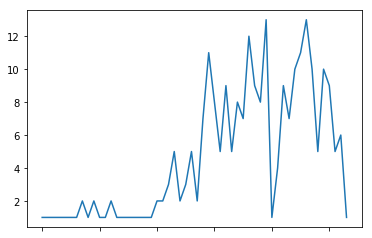

In [41]:
df['year'].value_counts().sort_index().plot()

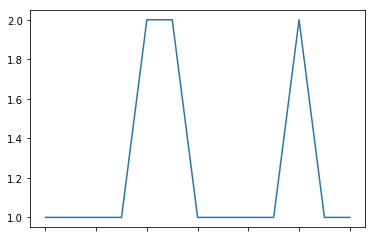

In [42]:
df[
    df['area'].apply(lambda x: '中国大陆' in x)
]['year'].value_counts().sort_index().plot()

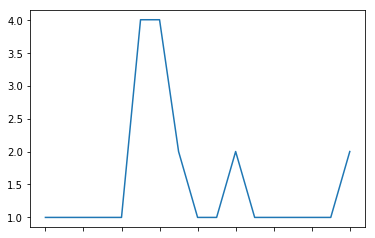

In [43]:
df[
    df['area'].apply(lambda x: '香港' in x)
]['year'].value_counts().sort_index().plot()

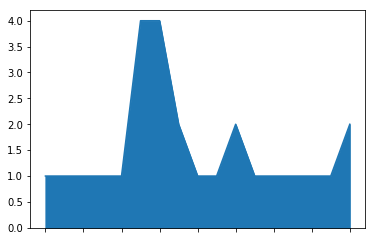

In [44]:
df[
    df['area'].apply(lambda x: '香港' in x)
]['year'].value_counts().sort_index().plot(kind='area')

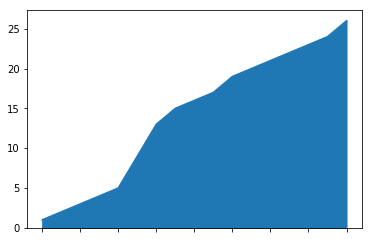

In [45]:
df[
    df['area'].apply(lambda x: '香港' in x)
]['year'].value_counts().sort_index().cumsum().plot(kind='area')

In [46]:
s_hk = df[
    df['area'].apply(lambda x: '香港' in x)
]['year'].value_counts().sort_index()
s_cn = df[
    df['area'].apply(lambda x: '中国大陆' in x)
]['year'].value_counts().sort_index()

In [47]:
df_hk_cn = pd.DataFrame({
    'HK': s_hk,
    'CN': s_cn
})
df_hk_cn

,CN,HK
1979,1.0,NaN
1986,NaN,1.0
1987,1.0,1.0
1990,NaN,1.0
1991,NaN,1.0
1992,1.0,1.0
1993,1.0,4.0
1994,2.0,4.0
1995,2.0,2.0
1996,NaN,1.0


In [48]:
#df_hk_cn

In [49]:
df_hk_cn = df_hk_cn.reset_index()
df_hk_cn = df_hk_cn[
    df_hk_cn['index'] != '2004(中国大陆)'
]
df_hk_cn

,index,CN,HK
0,1979,1.0,NaN
1,1986,NaN,1.0
2,1987,1.0,1.0
3,1990,NaN,1.0
4,1991,NaN,1.0
5,1992,1.0,1.0
6,1993,1.0,4.0
7,1994,2.0,4.0
8,1995,2.0,2.0
9,1996,NaN,1.0


In [50]:
df_hk_cn.set_index('index').cumsum()

,CN,HK
index,,
1979,1.0,NaN
1986,NaN,1.0
1987,2.0,2.0
1990,NaN,3.0
1991,NaN,4.0
1992,3.0,5.0
1993,4.0,9.0
1994,6.0,13.0
1995,8.0,15.0


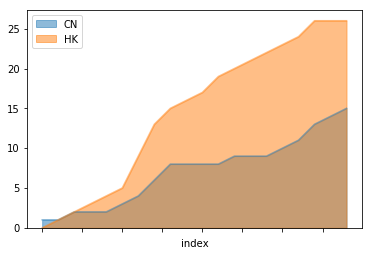

In [51]:
df_hk_cn.set_index('index').fillna(0).cumsum().plot(kind='area', stacked=False)

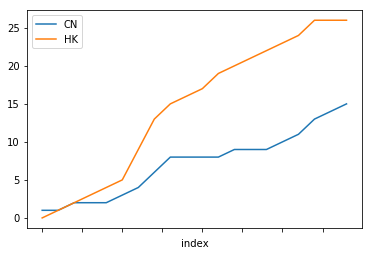

In [52]:
df_hk_cn.set_index('index').fillna(0).cumsum().plot()

In [53]:
#df_hk_cn['index'].values